In [125]:
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd


import seaborn as sns; sns.set()

from bokeh.charts import BoxPlot, show
from bokeh.io import push_notebook,show,output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure 
output_notebook()

%matplotlib inline


Loading BokehJS ...

In [126]:
mat1 = loadmat('693ffd_compareResponse_block_1.mat',squeeze_me=1)
mat2 = loadmat('693ffd_compareResponse_block_2.mat',squeeze_me=1)
mat3 = loadmat('c19968_compareResponse_block_1.mat',squeeze_me=1)
mat4 = loadmat('c19968_compareResponse_block_2.mat',squeeze_me=1)
mat5 = loadmat('acabb1_compareResponse.mat',squeeze_me=1)
#mat5

In [127]:
respLo = mat1['respLo']
respHi = mat1['respHi']
button1 = mat1['buttonLocs']
button2 = mat2['buttonLocs']
button3 = mat3['buttonLocs']
button4 = mat4['buttonLocs']


In [128]:
a = np.arange(0,button1.shape[0])
ndata1 = {n: 1e3*button1[n] for n in a}

a = np.arange(0,button2.shape[0])
ndata2 = {n: 1e3*button2[n] for n in a}

a= np.arange(0,button3.shape[0])
ndata3 = {n: 1e3*button3[n] for n in a}

a = np.arange(0,button4.shape[0])
ndata4 = {n: 1e3*button4[n] for n in a}

your_keys = {'cort','difference'}
ndata5 = {your_key: mat5[your_key] for your_key in your_keys}

In [129]:
dataFdict1 = pd.DataFrame.from_dict(ndata1,orient='columns')
dataFdict2 = pd.DataFrame.from_dict(ndata2,orient='columns')

dataFdict3 = pd.DataFrame.from_dict(ndata3,orient='columns')

dataFdict4 = pd.DataFrame.from_dict(ndata4,orient='columns')

dataFdict_5_1 = pd.DataFrame(ndata5['cort'],columns=['200 ms '])
dataFdict_5_2 = pd.DataFrame(ndata5['difference'],columns=['tactor'])
dataFdict5 = pd.concat([dataFdict_5_1,dataFdict_5_2])


In [130]:
dataFdict1.columns = ['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms ']
dataFdict2.columns = ['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms ']
dataFdict3.columns = ['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms ']
dataFdict4.columns = ['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms ']

In [131]:
dataMelt1 = pd.melt(dataFdict1)
#dataMelt1['Subject'] = '693ffd'
dataMelt1['Subject'] = '3'

dataMelt1['block'] = '1'
               
dataMelt2 = pd.melt(dataFdict2)
#dataMelt2['Subject'] = '693ffd'
dataMelt2['Subject'] = '3'

dataMelt2['block'] = '2'
             
dataMelt3 = pd.melt(dataFdict3)
#dataMelt3['Subject'] = 'c19968'
dataMelt3['Subject'] = '2'

dataMelt3['block'] = '1'



dataMelt4 = pd.melt(dataFdict4)
#dataMelt4['Subject'] = 'c19968'
dataMelt4['Subject'] = '2'

dataMelt4['block'] = '2'

dataMelt5 = pd.melt(dataFdict5)
#dataMelt5['Subject'] = 'acabb1'
dataMelt5['Subject'] = '1'


dataMelt5['block'] = '1'

In [132]:
dataMelt1.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)
dataMelt2.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)
dataMelt3.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)
dataMelt4.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)
dataMelt5.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)
#dataMelt4
#dataMelt5

In [133]:
frames = [dataMelt1,dataMelt2,dataMelt3,dataMelt4,dataMelt5]
result = pd.concat(frames)
result
resultTrim = result[(result['response time (ms)'] < 1000) & (result['response time (ms)'] > 100)]
resultTrim.groupby(['experiment','Subject','block']).mean()
#resultTrim
#resultNoNa = result.dropna()
#resultNoNa

experimentsOfInt = ['tactor','100 ms ','200 ms ','400 ms ', '800 ms ']

dataCleaned = resultTrim[resultTrim['experiment'].isin(experimentsOfInt)]



In [134]:
dataCleaned

,experiment,response time (ms),Subject,block
1,tactor,506.75712,3,1
2,tactor,477.06112,3,1
3,tactor,150.65088,3,1
4,tactor,300.76928,3,1
5,tactor,155.89376,3,1
6,tactor,131.72736,3,1
7,tactor,152.49408,3,1
8,tactor,176.37376,3,1
9,tactor,181.86240,3,1
10,tactor,119.39840,3,1


In [135]:
resultTrim

,experiment,response time (ms),Subject,block
1,tactor,506.75712,3,1
2,tactor,477.06112,3,1
3,tactor,150.65088,3,1
4,tactor,300.76928,3,1
5,tactor,155.89376,3,1
6,tactor,131.72736,3,1
7,tactor,152.49408,3,1
8,tactor,176.37376,3,1
9,tactor,181.86240,3,1
10,tactor,119.39840,3,1


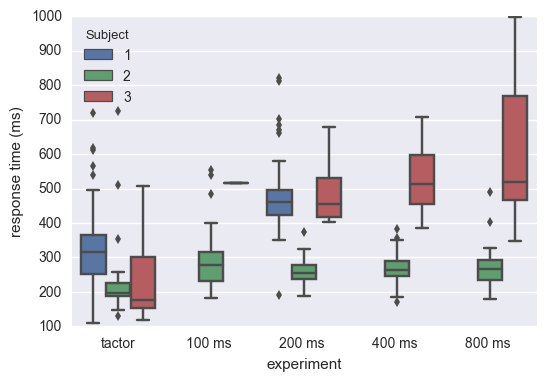

In [136]:
#frame1 = sns.boxplot(x = 'experiment',y='response time (ms)',hue='Subject',orient="v", data = resultTrim,order = ['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms '])
frame1 = sns.boxplot(x = 'experiment',y='response time (ms)',hue='Subject',orient="v", data = resultTrim,order = ['tactor','100 ms ','200 ms ','400 ms ','800 ms '])

#frame1.axes.get_xaxis().set_visible(False)
#frame1.legend(resultTrim.experiment)
fig1 = plt.gcf()
#fig1.suptitle('Reaction times for different experimental conditions')
#fig1.set_size_inches(10.5, 10.5)
#fig1.savefig('responseTimesBySID.svg', dpi=600)

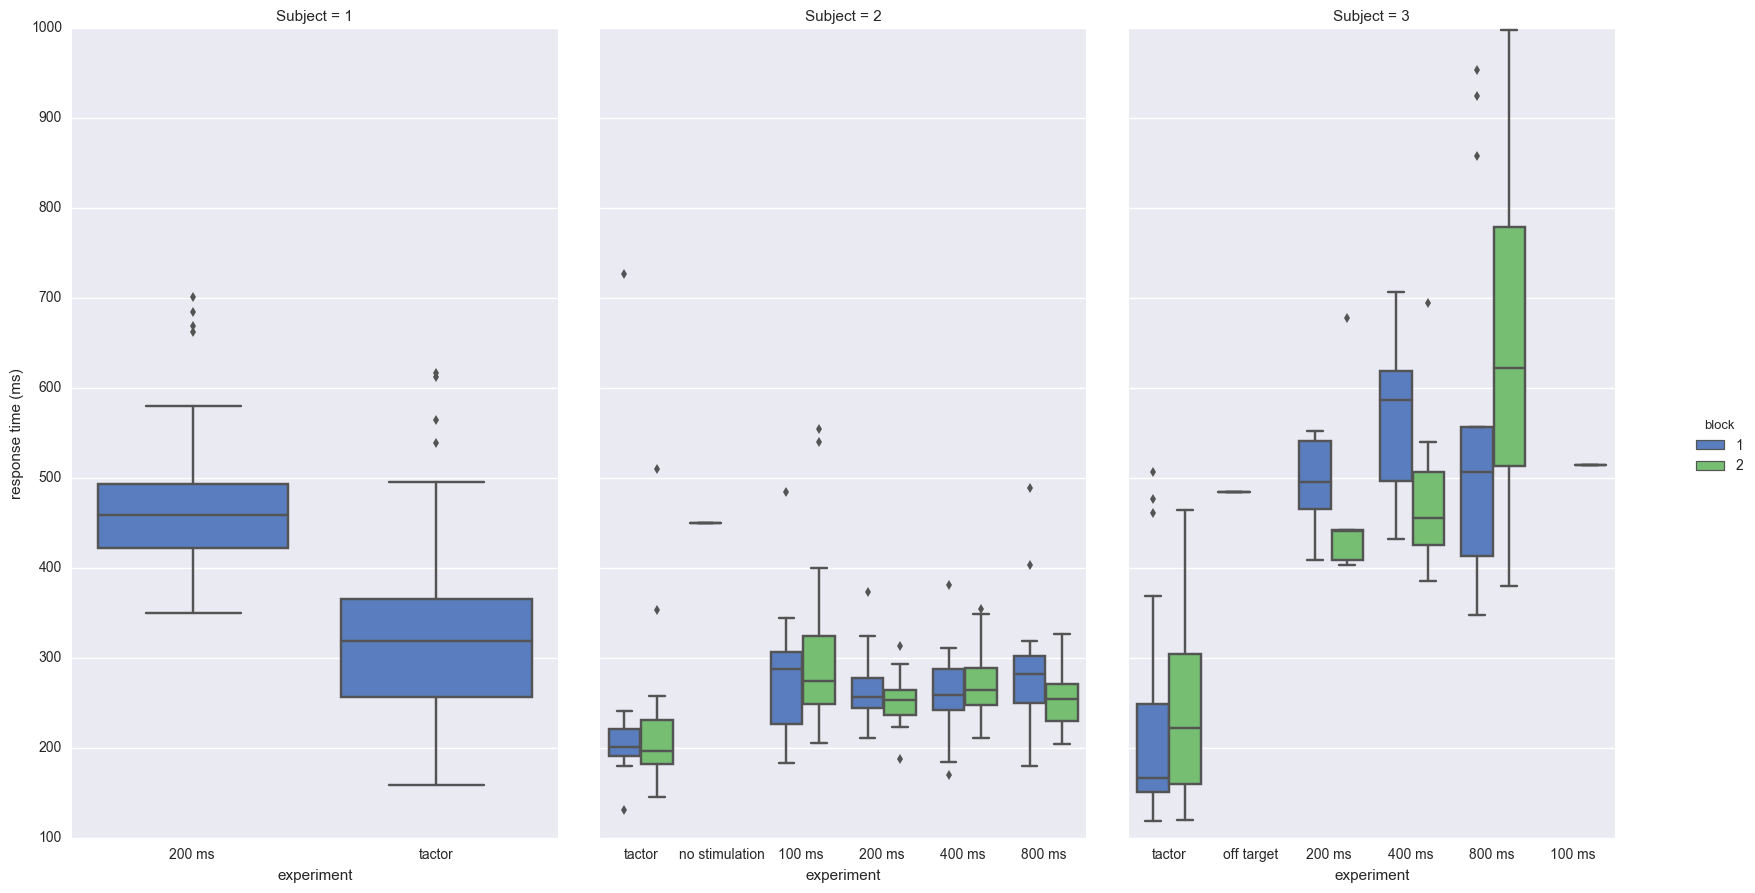

In [31]:
g = sns.FacetGrid(resultTrim,col="Subject",size=4,aspect=0.7,sharex=False)
(g.map(sns.boxplot, "experiment","response time (ms)","block",palette="muted")
 .despine(left=True)
 .add_legend(title="block"))
fig2 = plt.gcf()
fig2.set_size_inches(18.5, 10.5)
#fig2.savefig('responseTimesByBlock.svg', dpi=600)

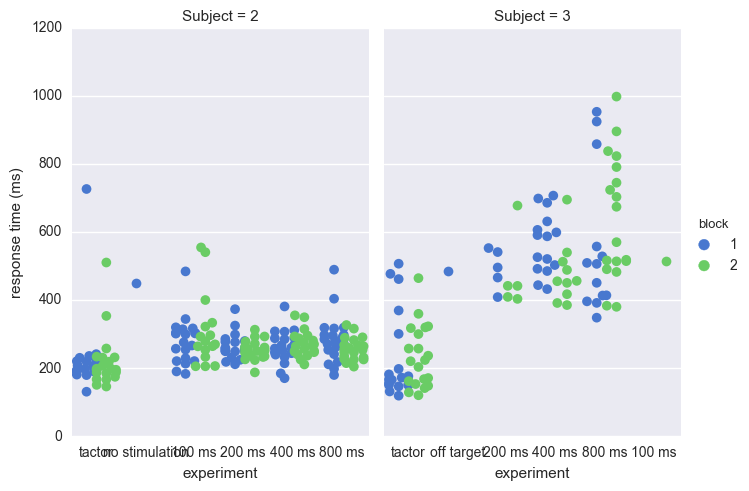

In [33]:
#frame4 = sns.FacetGrid(resultTrim,col="Subject",size=5,aspect=0.7,sharex=False)
resultTrim
frame4 = sns.FacetGrid(resultTrim,col="Subject",size=5,aspect=0.7,col_order=['2','3'],sharex=False)

(frame4.map(sns.swarmplot,"experiment","response time (ms)","block",split="True",palette="muted",size=7)
 .despine(left=True)
 .add_legend(title="block")
)
fig3 = plt.gcf()
#fig3.set_size_inches(18.5, 10.5)
#fig3.savefig('swarmByBlock.svg', dpi=600)

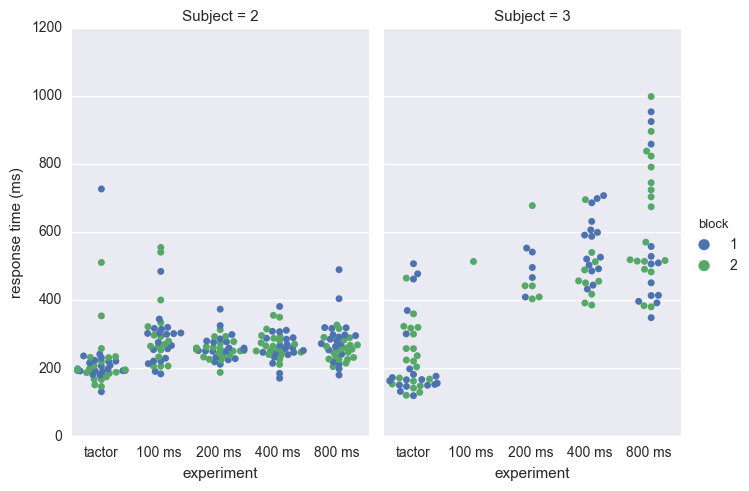

In [76]:
g = sns.factorplot(x="experiment", y="response time (ms)", hue="block",size=5,aspect=0.7,
...                   col="Subject", data=resultTrim,kind="swarm",col_order=['2','3'],
...                   order=['tactor','100 ms ','200 ms ','400 ms ','800 ms '])
g.savefig('swarmByBlock.svg', dpi=600)

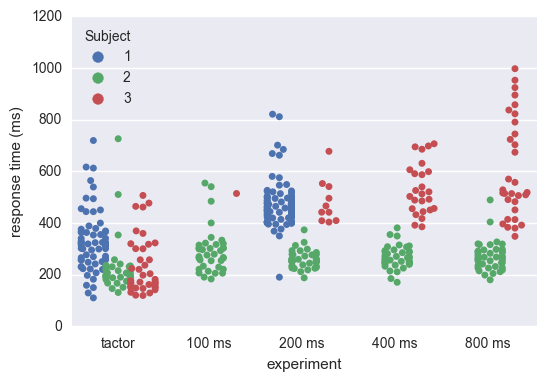

In [137]:
#frame5 = sns.swarmplot(x = 'experiment',y='response time (ms)',hue='Subject',data = resultTrim, split="True",order=['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms '])
frame5 = sns.swarmplot(x = 'experiment',y='response time (ms)',hue='Subject',data = resultTrim, split="True",order=['tactor','100 ms ','200 ms ','400 ms ','800 ms '])
fig5 = plt.gcf()
handles, labels = frame5.get_legend_handles_labels()

frame5.legend(handles, labels, loc="upper left", title="Subject")

#plt.legend(loc='upper left')


#fig.set_size_inches(18.5, 10.5)
#fig5.savefig('swarmSID.svg', dpi=600)

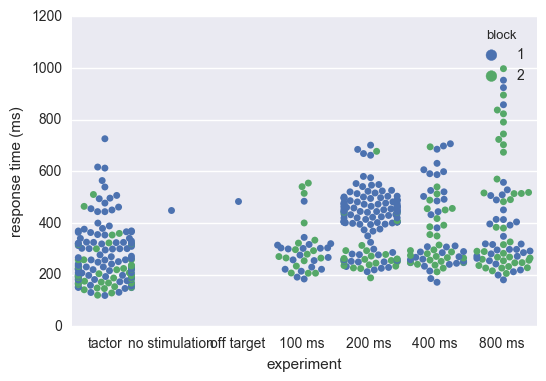

In [14]:
#frame6 = sns.boxplot(x = 'experiment',y='response times',hue='Subject',data = resultTrim,order=['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms '])
frame6 = sns.swarmplot(x = 'experiment',y='response time (ms)',data = resultTrim,hue='block',order=['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms '])

#frame6 = sns.swarmplot(x = 'experiment',y='response time (ms)',data = resultTrim,hue='block',order=['tactor','100 ms ','200 ms ','400 ms ','800 ms '])
fig6 = plt.gcf()
#fig5.savefig('swarmBLOCK.svg', dpi=600)
#frame6 = sns.swarmplot(x = 'experiment',y='response times',data = resultTrim,hue='Subject',color="0.1")

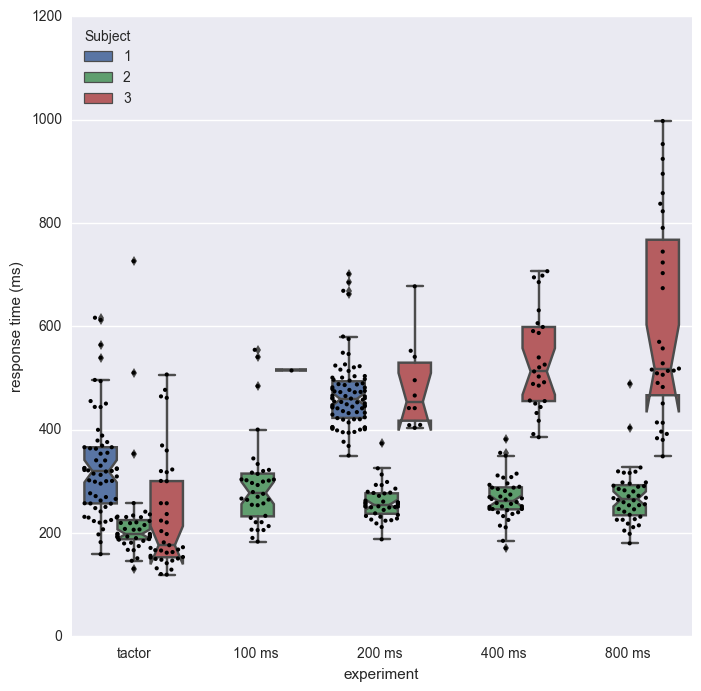

In [77]:
frame7 = sns.boxplot(x = 'experiment',y='response time (ms)',notch=True ,hue='Subject',orient="v", data = resultTrim,order = ['tactor','100 ms ','200 ms ','400 ms ','800 ms '])
handles, labels = frame7.get_legend_handles_labels()



frame7 = sns.swarmplot(x = 'experiment',y='response time (ms)',size=3,hue='Subject',data = resultTrim,palette=['black'],split="True",order=['tactor','100 ms ','200 ms ','400 ms ','800 ms '])
#sns.set_palette
frame7.legend_.remove()

frame7.legend(handles, labels, loc="upper left", title="Subject")

fig7 = plt.gcf()
fig7.set_size_inches(8,8)
fig7.savefig('swarmAndBoxSID.svg', dpi=600)

AttributeError: 'FacetGrid' object has no attribute 'legend'

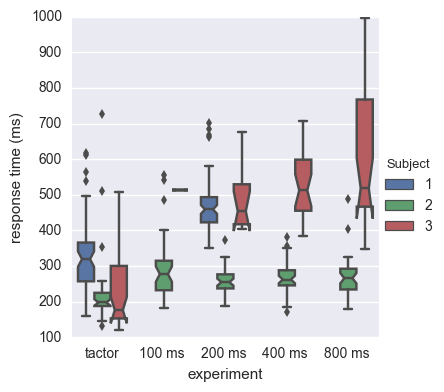

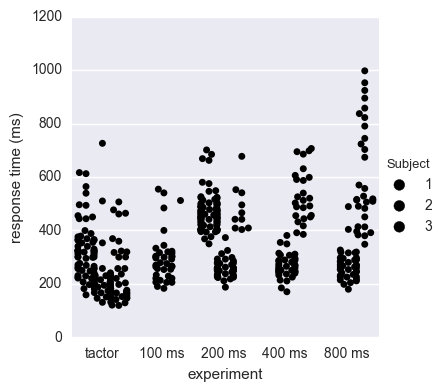

In [13]:
frame7 = sns.factorplot(x = 'experiment',y='response time (ms)',kind="box",notch=True ,hue='Subject',orient="v", data = resultTrim,order = ['tactor','100 ms ','200 ms ','400 ms ','800 ms '])
#handles, labels = frame7.get_legend_handles_labels()
frame7 = sns.factorplot(x = 'experiment',y='response time (ms)',hue='Subject',kind="swarm",data = resultTrim,palette=['black'],split="True",order=['tactor','100 ms ','200 ms ','400 ms ','800 ms '])
#sns.set_palette
#frame7.legend_.remove()

frame7.legend(handles, labels, loc="upper left", title="Subject")

fig7 = plt.gcf()
fig7.set_size_inches(11.5, 11.5)
#fig7.savefig('swarmAndBoxSID.svg', dpi=600)

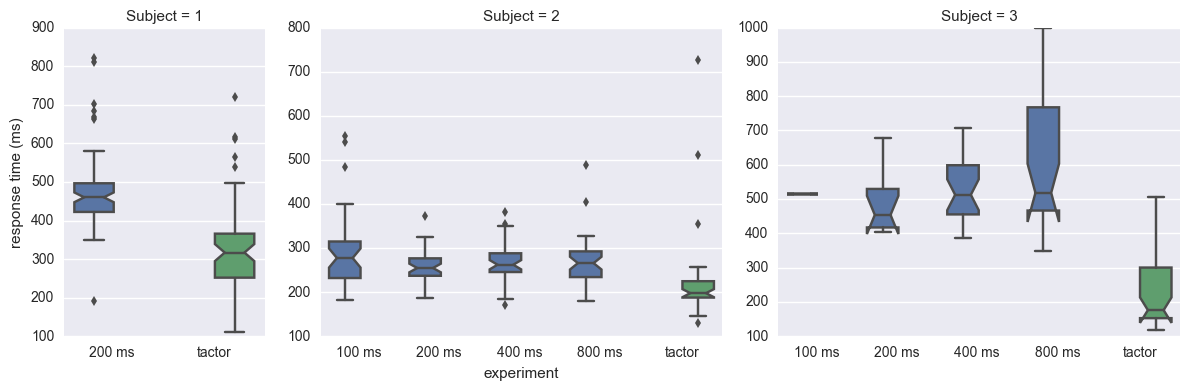

In [149]:
dataCleaned=dataCleaned.assign(experiment=dataCleaned.experiment.apply(str)).sort_values("experiment",ascending=True)

typeOrder= ['100 ms ','200 ms ','400 ms ', '800 ms ']

dataCleaned=dataCleaned.assign(typeOrder=dataCleaned.experiment.isin(typeOrder))

dataCleaned
dataCleaned['typeOrder'] = dataCleaned['typeOrder'].where(dataCleaned.experiment.isin(typeOrder),other='1')
dataCleaned['typeOrder'] = dataCleaned['typeOrder'].where(~dataCleaned.experiment.isin(typeOrder),other='0') 

#dataCleaned=dataCleaned.assign(tryThis=dataCleaned.where(dataCleaned.experiment.isin(typeOrder)))
#dataCleaned


frame8 = sns.FacetGrid(data=dataCleaned,col='Subject',size=4, aspect=1,sharex=False,sharey=False,gridspec_kws={"width_ratios": [2, 4, 4]})
#frame8.map(sns.swarmplot,'experiment','response time (ms)','typeOrder')

frame8.map(sns.boxplot, "experiment","response time (ms)",'typeOrder',notch=True,palette='deep')
frame8.axes[0,0].set_xlabel('')
frame8.axes[0,2].set_xlabel('')

#dataCleaned['typeOrder']
fig9 = plt.gcf()

#fig9.savefig('boxBySid.svg', dpi=600)

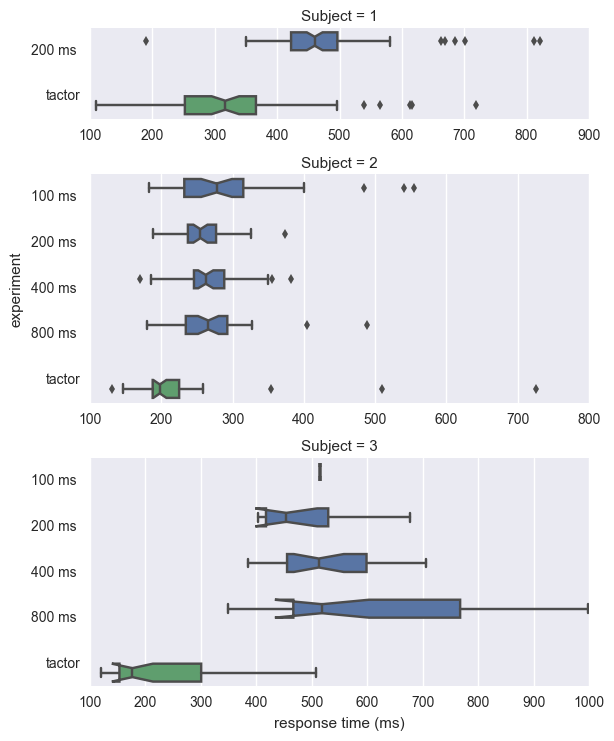

In [168]:
dataCleaned=dataCleaned.assign(experiment=dataCleaned.experiment.apply(str)).sort_values("experiment",ascending=True)

typeOrder= ['100 ms ','200 ms ','400 ms ', '800 ms ']

dataCleaned=dataCleaned.assign(typeOrder=dataCleaned.experiment.isin(typeOrder))

dataCleaned
dataCleaned['typeOrder'] = dataCleaned['typeOrder'].where(dataCleaned.experiment.isin(typeOrder),other='1')
dataCleaned['typeOrder'] = dataCleaned['typeOrder'].where(~dataCleaned.experiment.isin(typeOrder),other='0') 

#dataCleaned=dataCleaned.assign(tryThis=dataCleaned.where(dataCleaned.experiment.isin(typeOrder)))
#dataCleaned


frame8 = sns.FacetGrid(data=dataCleaned,row='Subject',size=2.5, aspect=2.5,sharex=False,sharey=False,gridspec_kws={"height_ratios": [0.1, 0.25, 0.25]})
#frame8.map(sns.swarmplot,'experiment','response time (ms)','typeOrder')

frame8.map(sns.boxplot,"response time (ms)", "experiment",'typeOrder',notch=True,palette='deep')
frame8.axes[0,0].set_ylabel('')
frame8.axes[2,0].set_ylabel('')

#dataCleaned['typeOrder']
fig9 = plt.gcf()

fig9.savefig('boxBySid_row.svg', dpi=600)

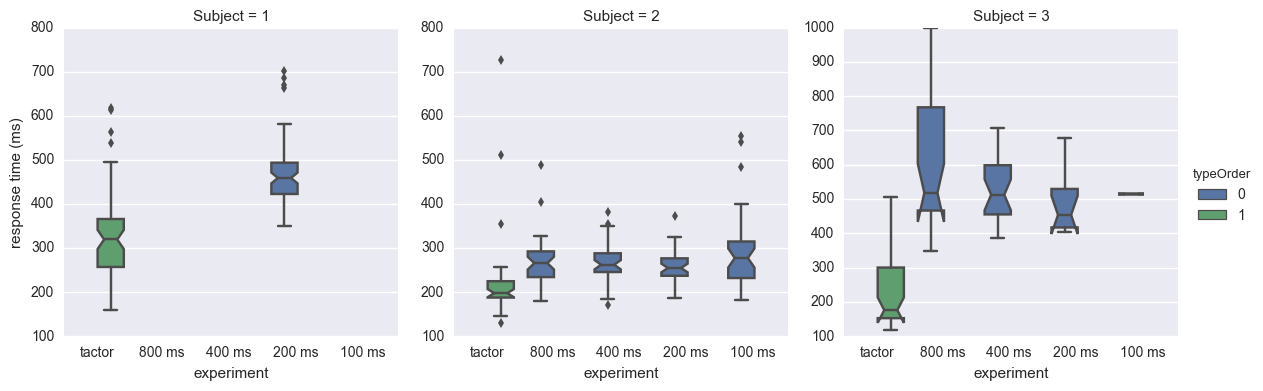

In [46]:

frame11 = sns.factorplot(x = 'experiment',y='response time (ms)',kind="box",notch=True 
                         ,col="Subject",hue='typeOrder',orient="v", data = dataCleaned,sharex=False,sharey=False
                         )


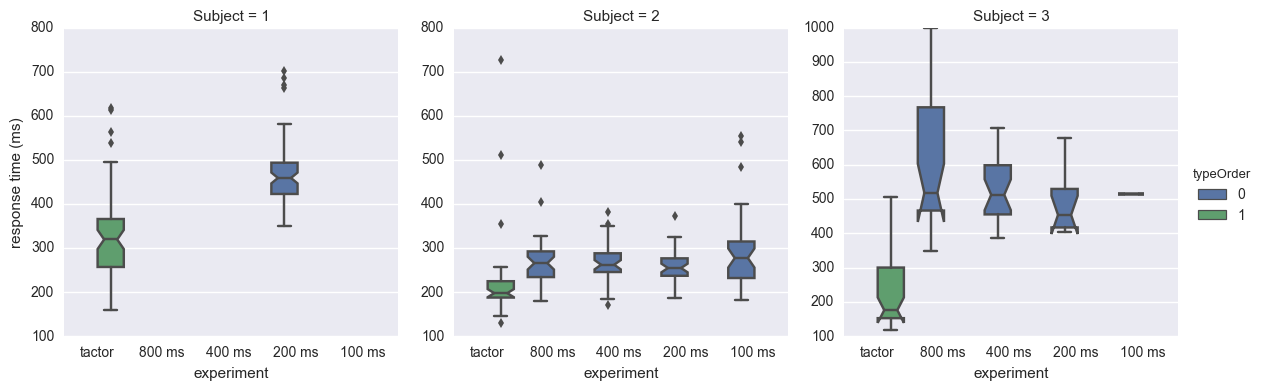

In [63]:

frame11 = sns.factorplot(x = 'experiment',y='response time (ms)',col='Subject',hue='typeOrder',
                         kind="box",notch=True ,orient="v", data = dataCleaned,sharex=False,sharey=False)


In [ ]:
frame9 = sns.boxplot(x = 'experiment',y='response time (ms)',hue='Subject',orient="v", data = resultTrim,order = ['tactor','100 ms ','200 ms ','400 ms ','800 ms '])
frame10 = sns.boxplot(x = 'experiment',y='response time (ms)',hue='Subject',orient="v", data = resultTrim,order = ['tactor','100 ms ','200 ms ','400 ms ','800 ms '])
frame11 =sns.boxplot(x = 'experiment',y='response time (ms)',hue='Subject',orient="v", notch=True,data = resultTrim,order = ['tactor','100 ms ','200 ms ','400 ms ','800 ms '])

frame1 = sns.boxplot(x = 'experiment',y='response time (ms)',hue='Subject',orient="v",notch=True data = resultTrim,order = ['tactor','100 ms ','200 ms ','400 ms ','800 ms '])


In [119]:
#sub1_tact = dataCleaned[experiment["tactor"]][Subject["1"]]
sub1_200 = dataCleaned[(dataCleaned.experiment=='200 ms ') & (dataCleaned.Subject=='1')]['response time (ms)']
sub1_tact = dataCleaned[(dataCleaned.experiment=='tactor') & (dataCleaned.Subject=='1')]['response time (ms)']
scipy.stats.kruskal(sub1_200,sub1_tact)

KruskalResult(statistic=62.152619726144415, pvalue=3.1784391388461527e-15)

In [120]:
sub2_100 = dataCleaned[(dataCleaned.experiment=='100 ms ') & (dataCleaned.Subject=='2')]['response time (ms)']
sub2_200 = dataCleaned[(dataCleaned.experiment=='200 ms ') & (dataCleaned.Subject=='2')]['response time (ms)']
sub2_400 = dataCleaned[(dataCleaned.experiment=='400 ms ') & (dataCleaned.Subject=='2')]['response time (ms)']
sub2_800 = dataCleaned[(dataCleaned.experiment=='800 ms ') & (dataCleaned.Subject=='2')]['response time (ms)']
sub2_tact = dataCleaned[(dataCleaned.experiment=='tactor') & (dataCleaned.Subject=='2')]['response time (ms)']
scipy.stats.kruskal(sub2_100,sub2_400,sub2_800,sub2_200,sub2_tact)

KruskalResult(statistic=48.672775765865822, pvalue=6.8325958392168827e-10)

In [121]:
sub3_100 = dataCleaned[(dataCleaned.experiment=='100 ms ') & (dataCleaned.Subject=='3')]['response time (ms)']
sub3_200 = dataCleaned[(dataCleaned.experiment=='200 ms ') & (dataCleaned.Subject=='3')]['response time (ms)']
sub3_400 = dataCleaned[(dataCleaned.experiment=='400 ms ') & (dataCleaned.Subject=='3')]['response time (ms)']
sub3_800 = dataCleaned[(dataCleaned.experiment=='800 ms ') & (dataCleaned.Subject=='3')]['response time (ms)']
sub3_tact = dataCleaned[(dataCleaned.experiment=='tactor') & (dataCleaned.Subject=='3')]['response time (ms)']
scipy.stats.kruskal(sub3_100,sub3_400,sub3_800,sub3_200,sub3_tact)

KruskalResult(statistic=64.595859129181463, pvalue=3.1304346607123176e-13)

<bound method TukeyHSDResults.summary of <statsmodels.sandbox.stats.multicomp.TukeyHSDResults object at 0x0000025BC40D1B70>>

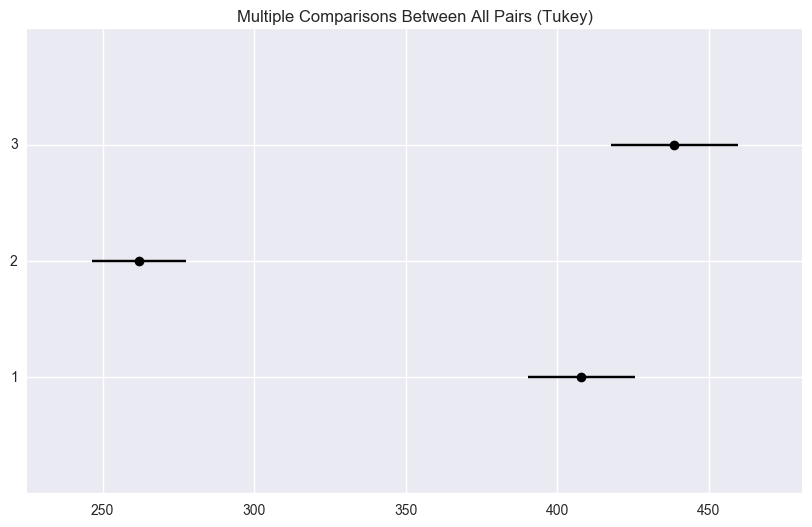

In [124]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

dataStats = dataCleaned['response time (ms)']
groupsStats = dataCleaned['']

tukey = pairwise_tukeyhsd(endog=dataStats,     # Data
                          groups=groupsStats,   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals

tukey.summary

In [33]:
# convert Pandas Data Frame to CSV, then read into matlab, resave
resultTrim.to_csv('resultTrim.csv', sep=',')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019F34D43860>]], dtype=object)

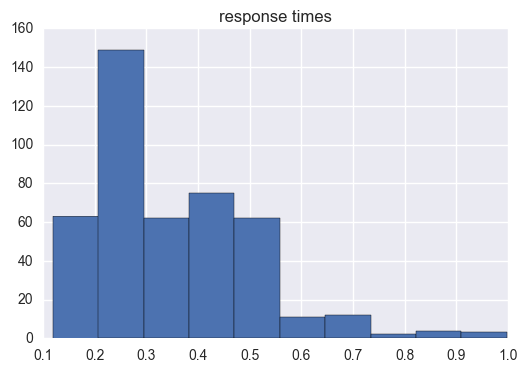

In [48]:
resultTrim.hist()

TypeError: cannot perform reduce with flexible type

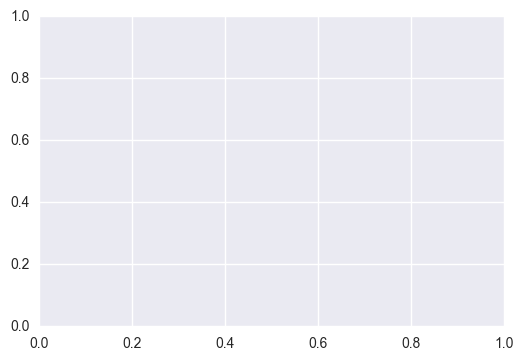

In [50]:
fig, ax = plt.subplots()
for a in resultTrim.columns:
    sns.distplot(a, bins=range(1, 110, 10), ax=ax, kde=False)
ax.set_xlim([0, 100])

In [20]:
#from bokeh.charts import BoxPlot, show
#from bokeh.sampledata.autompg import autompg as df
#output_notebook


In [21]:

p = BoxPlot(resultTrim, values='response times', label=['sid','experiment'],color='experiment',
            title="Response Times")

show(p)